Installing all the packages 

In [2]:
install.packages("psych")
install.packages("ggplot2")
install.packages("plotly")
install.packages("expss")
install.packages("PerformanceAnalytics")
install.pakages("GGally")

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

also installing the dependency ‘mnormt’


Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

also installing the dependencies ‘hexbin’, ‘data.table’


Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

also installing the dependencies ‘checkmate’, ‘htmlTable’, ‘matrixStats’


Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘quadprog’, ‘zoo’




ERROR: Error in install.pakages("GGally"): could not find function "install.pakages"


In [3]:
install.packages("corrplot")
install.packages("ggthemes")
install.packages("stringsr")
install.packages("repr")
install.packages("tidyr")
install.packages("caret")

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

Warning message:
“package ‘stringsr’ is not available (for R version 3.6.3)”
Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘iterators’, ‘gower’, ‘ipred’, ‘RcppRoll’, ‘timeDate’, ‘foreach’, ‘ModelMetrics’, ‘recipes’




In [4]:
library(readr)
library(psych, warn.conflicts=F)
library(ggplot2,warn.conflicts=F)
library(plotly,warn.conflicts=F)
library(expss,warn.conflicts=F)
require(reshape2)
library(PerformanceAnalytics)
library(GGally)
library(corrplot)
library(ggthemes)
library(stringr)
library(repr)
library(plotly)
library(tidyr)
library(caret)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


Use 'expss_output_viewer()' to display tables in the RStudio Viewer.
 To return to the console output, use 'expss_output_default()'.


Loading required package: reshape2

Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 


Attaching package: ‘xts’


The following objects are masked from ‘package:expss’:

    first, last



Attaching package: ‘PerformanceAnalytics’


The following object is masked from ‘package:graphics’:

    legend




ERROR: Error in library(GGally): there is no package called ‘GGally’


In [5]:
install.packages("GGally")

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

also installing the dependency ‘reshape’




In [6]:
library(GGally)

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



Extracting data from csv and storing in a variable and taking a subgroup of only the daily values from the dataset

In [8]:
hungry <- read.csv("menu.csv", header=T)

In [9]:
new_names <- gsub(pattern = "*....Daily.Value.", replacement=".DV", names(hungry))
names(hungry) <- new_names

In [10]:
str(hungry)

'data.frame':	260 obs. of  24 variables:
 $ Category         : Factor w/ 9 levels "Beef & Pork",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ Item             : Factor w/ 260 levels "1% Low Fat Milk Jug",..: 76 77 228 229 230 245 12 11 14 13 ...
 $ Serving.Size     : Factor w/ 107 levels "1 carton (236 ml)",..: 55 54 42 69 69 83 63 72 65 73 ...
 $ Calories         : int  300 250 370 450 400 430 460 520 410 470 ...
 $ Calories.from.Fat: int  120 70 200 250 210 210 230 270 180 220 ...
 $ Total.Fat        : num  13 8 23 28 23 23 26 30 20 25 ...
 $ Total.Fat.DV     : int  20 12 35 43 35 36 40 47 32 38 ...
 $ Saturated.Fat    : num  5 3 8 10 8 9 13 14 11 12 ...
 $ Saturated.Fat.DV : int  25 15 42 52 42 46 65 68 56 59 ...
 $ Trans.Fat        : num  0 0 0 0 0 1 0 0 0 0 ...
 $ Cholesterol      : int  260 25 45 285 50 300 250 250 35 35 ...
 $ Cholesterol.DV   : int  87 8 15 95 16 100 83 83 11 11 ...
 $ Sodium           : int  750 770 780 860 880 960 1300 1410 1300 1420 ...
 $ Sodium.DV        : int  31 32 33 

In [13]:
library(dplyr)


Attaching package: ‘dplyr’


The following object is masked from ‘package:GGally’:

    nasa


The following objects are masked from ‘package:xts’:

    first, last


The following objects are masked from ‘package:expss’:

    between, compute, first, last, na_if, recode, vars


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [17]:
library(stringr)


Attaching package: ‘stringr’


The following objects are masked from ‘package:expss’:

    fixed, regex




Converting everything to similar units 
So all the liquids are converted to 'ml' and all food is taken in 'g'

In [18]:
drinks.oz <- hungry[str_detect(hungry$Serving.Size, " fl oz.*"),]
drinks.ml <- hungry[str_detect(hungry$Serving.Size, 'carton'),]

In [19]:
drinks.oz$Serving.Size <- 
  round(as.numeric(gsub(" fl oz.*", "", drinks.oz$Serving.Size))*29.5735,0)
drinks.ml$Serving.Size <- 
  round(as.numeric(gsub(".*\\((.*)\\ ml).*", "\\1", drinks.ml$Serving.Size)),0)

In [20]:
food.g <- hungry[str_detect(hungry$Serving.Size, 'g'),] 
food.g$Serving.Size <- 
  round(as.numeric(gsub(".*\\((.*)\\ g).*", "\\1", food.g$Serving.Size)),0)

In [21]:
hungry <- rbind(drinks.oz,drinks.ml)
hungry$Type <- rep("drinks.ml", nrow(hungry))
food.g$Type <- rep("food.g", nrow(food.g))
hungry <- rbind(hungry,food.g)

In [22]:
head(hungry)

,Category,Item,Serving.Size,Calories,Calories.from.Fat,Total.Fat,Total.Fat.DV,Saturated.Fat,Saturated.Fat.DV,Trans.Fat,⋯,Carbohydrates.DV,Dietary.Fiber,Dietary.Fiber.DV,Sugars,Protein,Vitamin.A.DV,Vitamin.C.DV,Calcium.DV,Iron.DV,Type
,<fct>,<fct>,<dbl>,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
111,Beverages,Coca-Cola Classic (Small),473,140,0,0,0,0,0,0,⋯,13,0,0,39,0,0,0,0,0,drinks.ml
112,Beverages,Coca-Cola Classic (Medium),621,200,0,0,0,0,0,0,⋯,18,0,0,55,0,0,0,0,0,drinks.ml
113,Beverages,Coca-Cola Classic (Large),887,280,0,0,0,0,0,0,⋯,25,0,0,76,0,0,0,0,0,drinks.ml
114,Beverages,Coca-Cola Classic (Child),355,100,0,0,0,0,0,0,⋯,9,0,0,28,0,0,0,0,0,drinks.ml
115,Beverages,Diet Coke (Small),473,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,drinks.ml
116,Beverages,Diet Coke (Medium),621,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,drinks.ml


In [23]:
hungry %>%
    tab_cols(total()) %>%
    tab_cells(Serving.Size) %>% 
    tab_stat_mean_sd_n() %>% 
    tab_cells(Category,Item) %>%
    tab_stat_cpct(total_row_position = "none", label = "col %") %>%
    tab_pivot(stat_position = "inside_rows")%>%
    set_caption("Category, items and serving size")

Category, items and serving size                                                                                                  
 |              |                                                               |       | #Total |
 | ------------ | ------------------------------------------------------------- | ----- | ------ |
 | Serving.Size |                                                          Mean |       |  376.1 |
 |              |                                                     Std. dev. |       |  209.0 |
 |              |                                                  Unw. valid N |       |  260.0 |
 |     Category |                                                   Beef & Pork | col % |    5.8 |
 |              |                                                     Beverages | col % |   10.4 |
 |              |                                                     Breakfast | col % |   16.2 |
 |              |                                                Chicken & Fish | col % |   10.4 |
 |              |                                                  Coffee & Tea | col % |   36.5 |
 |              |                                                      Desserts | col % |    2.7 |
 |              |                                                        Salads | col % |    2.3 |
 |              |                                            Smoothies & Shakes | col % |   10.8 |
 |              |                                                Snacks & Sides | col % |    5.0 |
 |         Item |                                           1% Low Fat Milk Jug | col % |    0.4 |
 |              |                                                  Apple Slices | col % |    0.4 |
 |              |                                 Bacon Buffalo Ranch McChicken | col % |    0.4 |
 |              |                                       Bacon Cheddar McChicken | col % |    0.4 |
 |              |                                        Bacon Clubhouse Burger | col % |    0.4 |
 |              |                       Bacon Clubhouse Crispy Chicken Sandwich | col % |    0.4 |
 |              |                      Bacon Clubhouse Grilled Chicken Sandwich | col % |    0.4 |
 |              |                                                Bacon McDouble | col % |    0.4 |
 |              |                                     Bacon, Egg & Cheese Bagel | col % |    0.4 |
 |              |                     Bacon, Egg & Cheese Bagel with Egg Whites | col % |    0.4 |
 |              |                   Bacon, Egg & Cheese Biscuit (Large Biscuit) | col % |    0.4 |
 |              |                 Bacon, Egg & Cheese Biscuit (Regular Biscuit) | col % |    0.4 |
 |              |   Bacon, Egg & Cheese Biscuit with Egg Whites (Large Biscuit) | col % |    0.4 |
 |              | Bacon, Egg & Cheese Biscuit with Egg Whites (Regular Biscuit) | col % |    0.4 |
 |              |                                Bacon, Egg & Cheese McGriddles | col % |    0.4 |
 |              |                Bacon, Egg & Cheese McGriddles with Egg Whites | col % |    0.4 |
 |              |                                               Baked Apple Pie | col % |    0.4 |
 |              |                                 Big Breakfast (Large Biscuit) | col % |    0.4 |
 |              |                               Big Breakfast (Regular Biscuit) | col % |    0.4 |
 |              |                 Big Breakfast with Egg Whites (Large Biscuit) | col % |    0.4 |
 |              |               Big Breakfast with Egg Whites (Regular Biscuit) | col % |    0.4 |
 |              |                   Big Breakfast with Hotcakes (Large Biscuit) | col % |    0.4 |
 |              |                 Big Breakfast with Hotcakes (Regular Biscuit) | col % |    0.4 |
 |              |    Big Breakfast with Hotcakes and Egg Whites (Large Biscuit) | col % |    0.4 |
 |              |  Big Breakfast with Hotcakes and Egg Whites (Regular Biscuit) | col % |    0.4 |
 |      

In [24]:
hungry %>%
    tab_cols(Category) %>%
    tab_cells(Serving.Size) %>% 
    tab_stat_mean_sd_n() %>%
    tab_cells(Item) %>%
    tab_stat_cpct(total_row_position = "none", label = "col %") %>%
    tab_pivot(stat_position = "inside_rows")%>%
    set_caption("Category and serving size")

Category and serving size                                                                                                                                                                                                                         
 |              |                                                               |       |    Category |           |           |                |              |          |        |                    |                |
 |              |                                                               |       | Beef & Pork | Beverages | Breakfast | Chicken & Fish | Coffee & Tea | Desserts | Salads | Smoothies & Shakes | Snacks & Sides |
 | ------------ | ------------------------------------------------------------- | ----- | ----------- | --------- | --------- | -------------- | ------------ | -------- | ------ | ------------------ | -------------- |
 | Serving.Size |                                                          Mean |       |       193.9 |     529.9 |     201.1 |          243.3 |        519.8 |    101.6 |  272.0 |              444.1 |          107.9 |
 |              |                                                     Std. dev. |       |        54.1 |     214.4 |      89.7 |          110.1 |        155.1 |     74.8 |   55.1 |              146.8 |           39.5 |
 |              |                                                  Unw. valid N |       |        15.0 |      27.0 |      42.0 |           27.0 |         95.0 |      7.0 |    6.0 |               28.0 |           13.0 |
 |         Item |                                           1% Low Fat Milk Jug | col % |             |       3.7 |           |                |              |          |        |                    |                |
 |              |                                                  Apple Slices | col % |             |           |           |                |              |          |        |                    |            7.7 |
 |              |                                 Bacon Buffalo Ranch McChicken | col % |             |           |           |            3.7 |              |          |        |                    |                |
 |              |                                       Bacon Cheddar McChicken | col % |             |           |           |            3.7 |              |          |        |                    |                |
 |              |                                        Bacon Clubhouse Burger | col % |         6.7 |           |           |                |              |          |        |                    |                |
 |              |                       Bacon Clubhouse Crispy Chicken Sandwich | col % |             |           |           |            3.7 |              |          |        |                    |                |
 |              |                      Bacon Clubhouse Grilled Chicken Sandwich | col % |             |           |           |            3.7 |              |          |        |                    |                |
 |              |                                                Bacon McDouble | col % |         6.7 |           |           |                |              |          |        |                    |                |
 |              |                                     Bacon, Egg & Cheese Bagel | col % |             |           |       2.4 |                |              |          |        |                    |                |
 |              |                     Bacon, Egg & Cheese Bagel with Egg Whites | col % |             |           |       2.4 |                |              |          |        |                    |                |
 |              |                   Bacon, Egg & Cheese Biscuit (Large Biscuit) | col % |             |           |       2.4 |                |              |          |        |                    |                |
 |              |                 Bacon, Egg & Chee

checking the new data after converting 

In [25]:
describe(hungry[,c(4:24)])

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Calories,1,260,368.2692308,240.2698865,340.0,350.2884615,207.56400,0,1880.0,1880.0,1.4357816,5.5788997,14.90090580
Calories.from.Fat,2,260,127.0961538,127.8759141,100.0,110.8894231,133.43400,0,1060.0,1060.0,2.1208157,10.2770357,7.93052753
Total.Fat,3,260,14.1653846,14.2059980,11.0,12.3557692,14.82600,0,118.0,118.0,2.1280226,10.3517054,0.88101860
Total.Fat.DV,4,260,21.8153846,21.8851988,17.0,19.0336538,23.72160,0,182.0,182.0,2.1371291,10.4238136,1.35726241
Saturated.Fat,5,260,6.0076923,5.3218732,5.0,5.4519231,6.30105,0,20.0,20.0,0.6560465,-0.4609420,0.33004857
Saturated.Fat.DV,6,260,29.9653846,26.6392088,24.0,27.1346154,31.13460,0,102.0,102.0,0.6774092,-0.4042764,1.65209360
Trans.Fat,7,260,0.2038462,0.4291329,0.0,0.1033654,0.00000,0,2.5,2.5,2.1112383,4.1351405,0.02661369
Cholesterol,8,260,54.9423077,87.2692575,35.0,36.0817308,44.47800,0,575.0,575.0,3.7551862,16.8794736,5.41220959
Cholesterol.DV,9,260,18.3923077,29.0916528,11.0,12.1250000,13.34340,0,192.0,192.0,3.7604179,16.9231605,1.80418772


In [26]:
names(hungry)

[1] "Category"          "Item"              "Serving.Size"     
 [4] "Calories"          "Calories.from.Fat" "Total.Fat"        
 [7] "Total.Fat.DV"      "Saturated.Fat"     "Saturated.Fat.DV" 
[10] "Trans.Fat"         "Cholesterol"       "Cholesterol.DV"   
[13] "Sodium"            "Sodium.DV"         "Carbohydrates"    
[16] "Carbohydrates.DV"  "Dietary.Fiber"     "Dietary.Fiber.DV" 
[19] "Sugars"            "Protein"           "Vitamin.A.DV"     
[22] "Vitamin.C.DV"      "Calcium.DV"        "Iron.DV"          
[25] "Type"

Making box plot for all the columns.

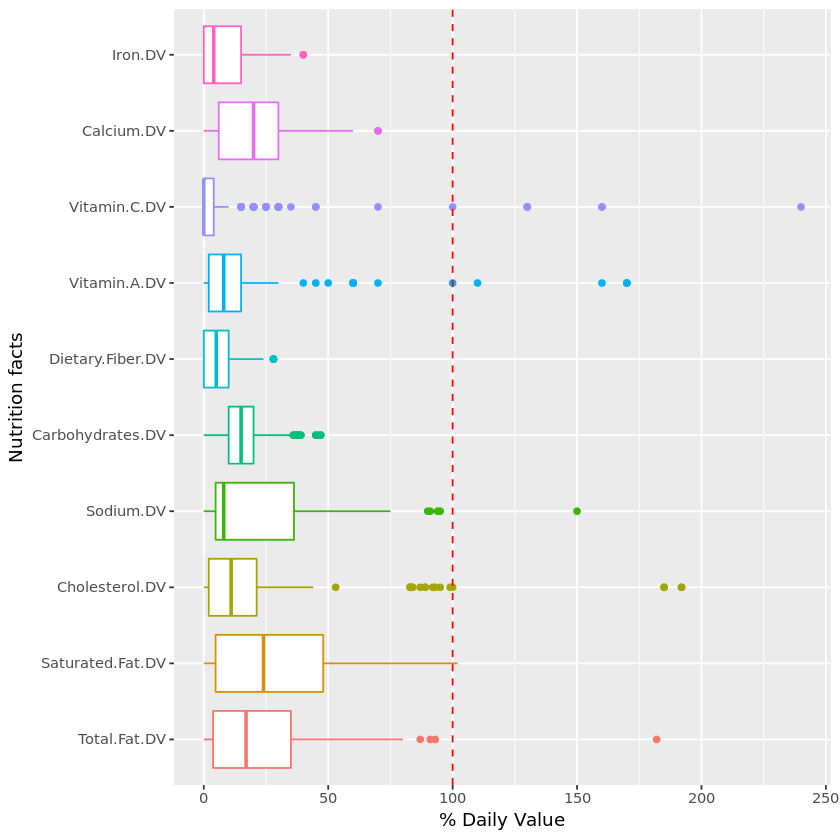

In [27]:
hungry$ID<-seq(1:260)
dat.m <- melt(hungry,id.vars='ID', measure.vars=c('Total.Fat.DV','Saturated.Fat.DV','Cholesterol.DV','Sodium.DV','Carbohydrates.DV','Dietary.Fiber.DV','Vitamin.A.DV','Vitamin.C.DV','Calcium.DV','Iron.DV'))
library(ggplot2)
p <- ggplot(dat.m) +
      geom_boxplot(aes(x=variable, y=value, color=variable))+coord_flip()+theme(legend.position = "none")+xlab('Nutrition facts')+ylab('% Daily Value')+
geom_hline(yintercept=100,linetype="dashed", color = "red")
p

Making box plot for all the categories in each column 

If the food contains anything above the red line meaning they should be avoided from your daily diet.

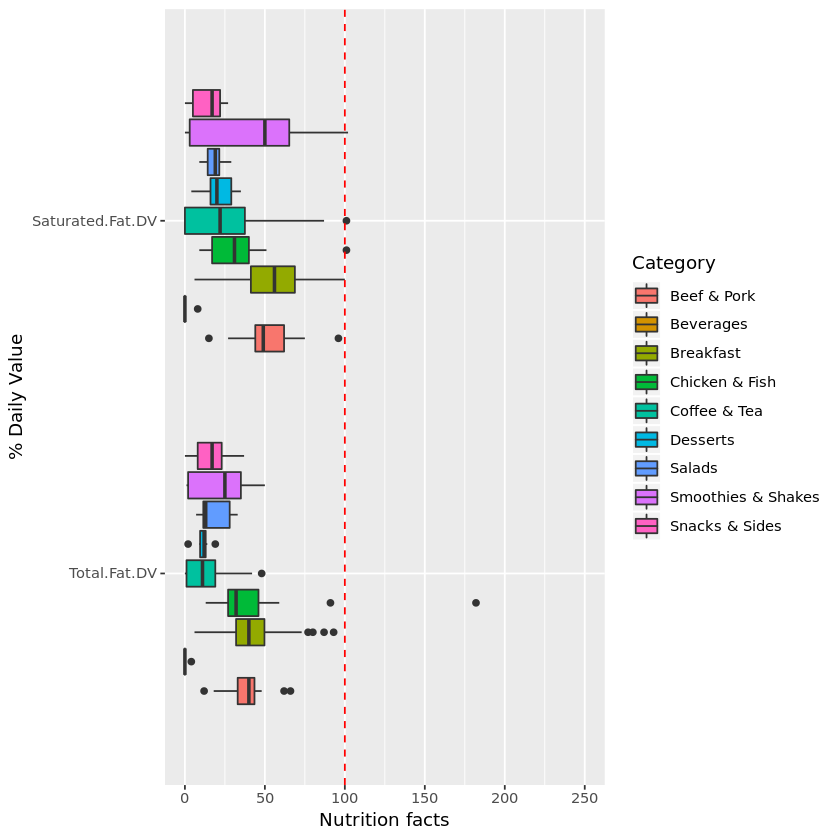

In [28]:
df.m <- melt(hungry[,c(1,7,9)], id.var = "Category")


p <- ggplot(data = df.m, aes(x=variable, y=value)) + 
  geom_boxplot(aes(fill=Category))
p + guides(fill=guide_legend(title="Category"))+coord_flip()+xlab('% Daily Value')+ylab('Nutrition facts')+
geom_hline(yintercept=100,linetype="dashed", color = "red")+ylim(0,250)

df.m <- melt(hungry[,c(1,12,14,16)], id.var = "Category")

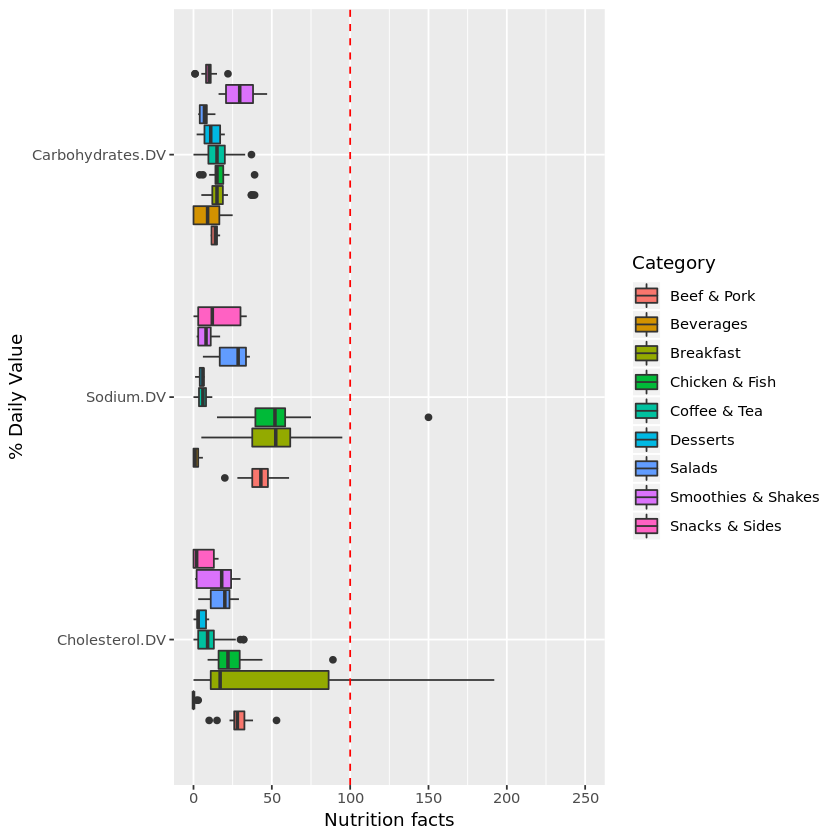

In [29]:
p <- ggplot(data = df.m, aes(x=variable, y=value)) + 
  geom_boxplot(aes(fill=Category))
p + guides(fill=guide_legend(title="Category"))+coord_flip()+xlab('% Daily Value')+ylab('Nutrition facts')+
geom_hline(yintercept=100,linetype="dashed", color = "red")+ylim(0,250)

df.m <- melt(hungry[,c(1,18,21)], id.var = "Category")

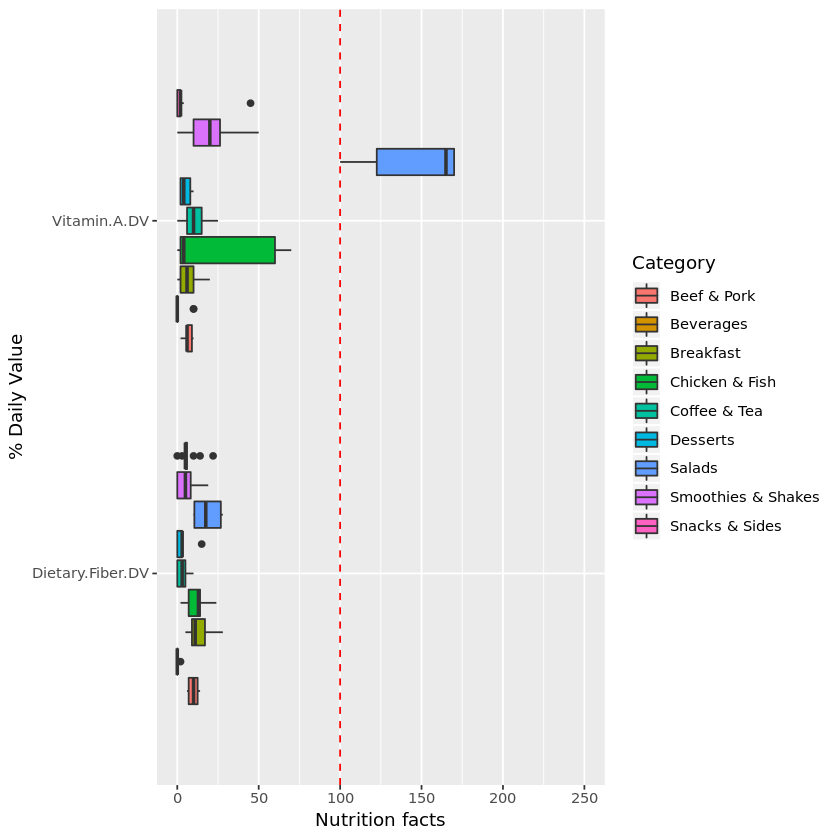

In [30]:
p <- ggplot(data = df.m, aes(x=variable, y=value)) + 
  geom_boxplot(aes(fill=Category))
p + guides(fill=guide_legend(title="Category"))+coord_flip()+xlab('% Daily Value')+ylab('Nutrition facts')+
geom_hline(yintercept=100,linetype="dashed", color = "red")+ylim(0,250)


df.m <- melt(hungry[,c(1,22,23,24)], id.var = "Category")

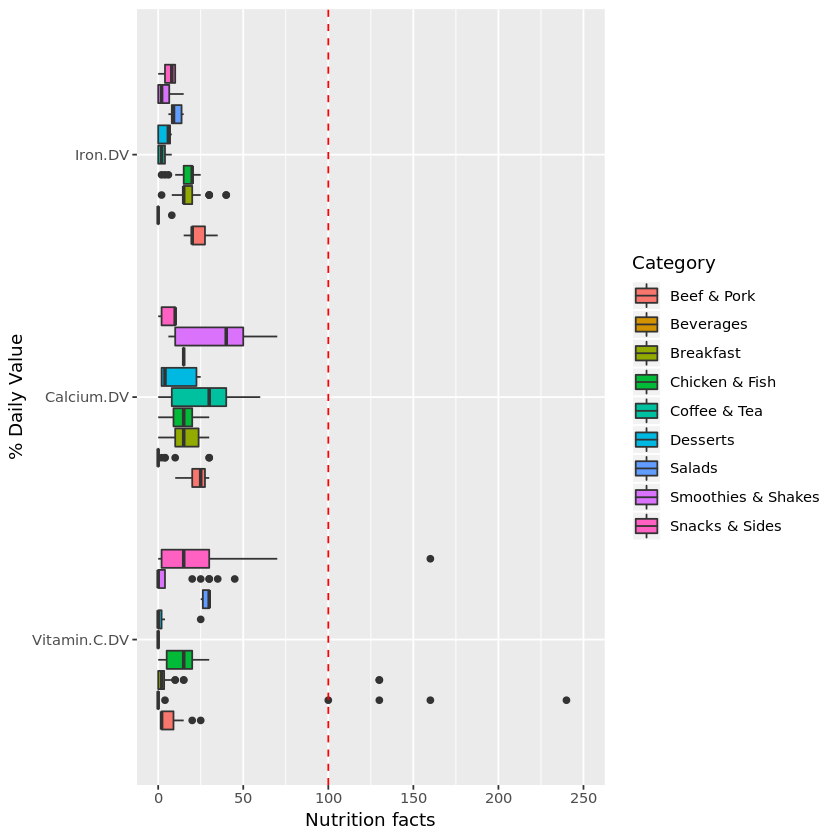

In [31]:
p <- ggplot(data = df.m, aes(x=variable, y=value)) + 
  geom_boxplot(aes(fill=Category))
p + guides(fill=guide_legend(title="Category"))+coord_flip()+xlab('% Daily Value')+ylab('Nutrition facts')+
geom_hline(yintercept=100,linetype="dashed", color = "red")+ylim(0,250)

In [33]:
library(tidyr)


Attaching package: ‘tidyr’


The following object is masked from ‘package:reshape2’:

    smiths


The following object is masked from ‘package:expss’:

    nest




In [35]:
require("ggplot2")

In [37]:
library(ggthemes)

plots of all columns combined 

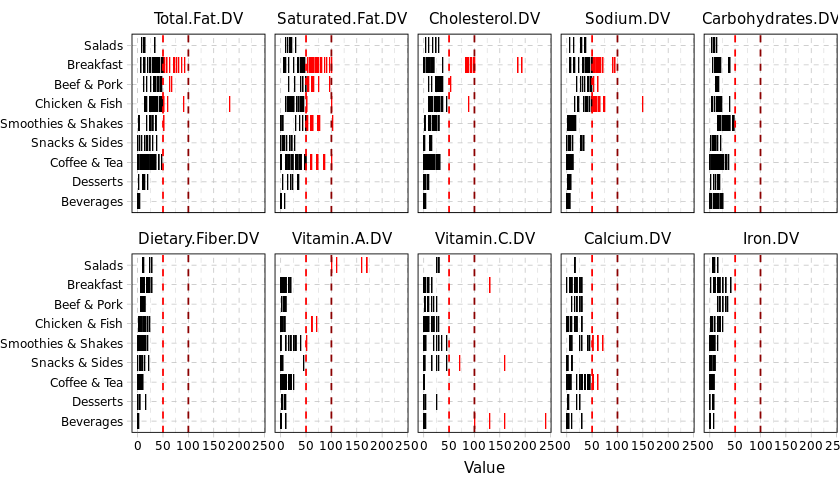

In [38]:
options(repr.plot.height=4, repr.plot.width=7)
hungry %>%
  gather(Nutrition, Value, Total.Fat:Iron.DV, factor_key=TRUE) %>%
  filter(grepl("DV", Nutrition)) %>%
  ggplot(aes(x = reorder(Category, Value), y = Value)) +
  geom_point(aes(colour=Value>=50), shape = "|", size=3) +
  geom_hline(yintercept = 50, linetype = 2, col='red') + geom_hline(yintercept = 100, linetype = 2, col='darkred') +
  facet_wrap(~ Nutrition, nrow=2) +
  coord_flip() +
  theme_pander(base_size=9) +
  theme(panel.border = element_rect(colour = 1, fill=NA), legend.position="none") +
  scale_colour_manual(name="", values = c("TRUE"="red", "FALSE"="black")) +
  labs(x = NULL)

Plots showing each item and its daily value and also indicating which one crosses the daily limit quantity

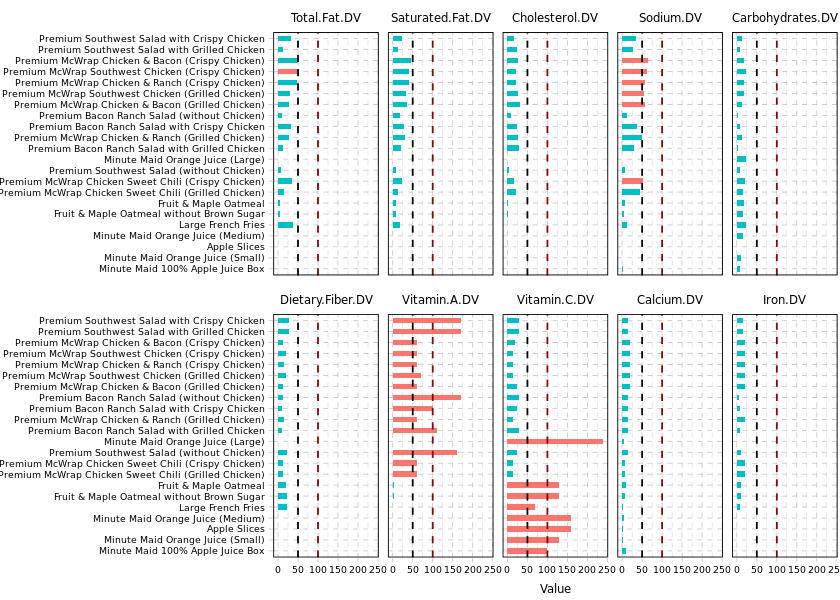

In [39]:
options(repr.plot.height=5, repr.plot.width=7)
hungry %>%
  filter(Vitamin.A.DV > 50 | Vitamin.C.DV > 50) %>%
  gather(Nutrition, Value, Total.Fat:Iron.DV, factor_key=TRUE) %>%
  filter(grepl("DV", Nutrition)) %>%
  ggplot(aes(x = reorder(Item, Value), y = Value, fill=Value<=50)) +
  geom_bar(width=0.5, stat = "identity") +
  geom_hline(yintercept = 50, linetype = 2) + geom_hline(yintercept = 100, linetype = 2, col='darkred')+
  facet_wrap(~ Nutrition, nrow=2) +
  coord_flip() +
  theme_pander(base_size = 7) +
  theme(panel.border = element_rect(colour = "black", fill=NA), legend.position="none") +
  labs(x = NULL)

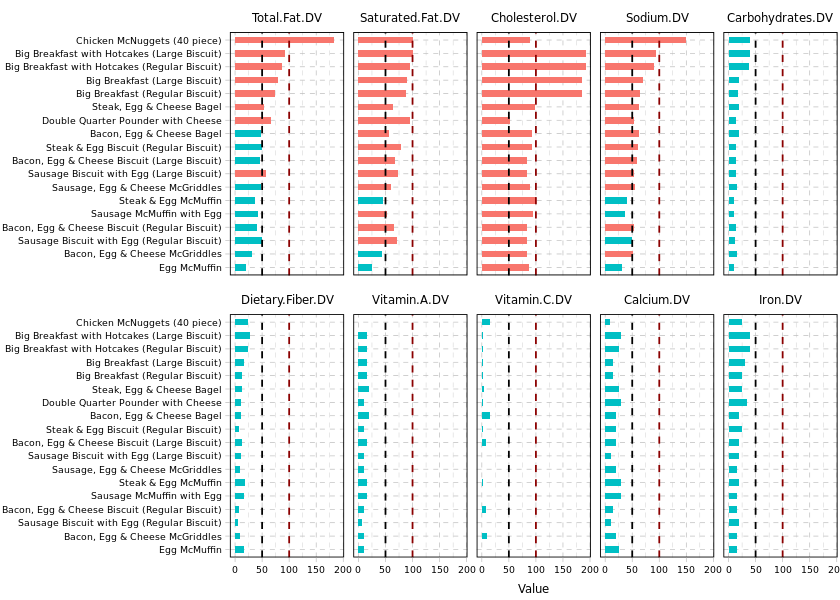

In [40]:
options(repr.plot.height=5, repr.plot.width=7)
hungry %>%
  filter(Cholesterol.DV > 50) %>%
  gather(Nutrition, Value, Total.Fat:Iron.DV, factor_key=TRUE) %>%
  filter(grepl("DV", Nutrition)) %>%
  ggplot(aes(x = reorder(Item, Value), y = Value, fill=Value<=50)) +
  geom_bar(width=0.5, stat = "identity") +
  geom_hline(yintercept = 50, linetype = 2)+ geom_hline(yintercept = 100, linetype = 2, col='darkred') +
  facet_wrap(~ Nutrition, nrow=2) +
  coord_flip() +
  theme_pander(base_size = 7) +
  theme(panel.border = element_rect(colour = "black", fill=NA)) +
  theme(legend.position="none") +
  labs(x = NULL)

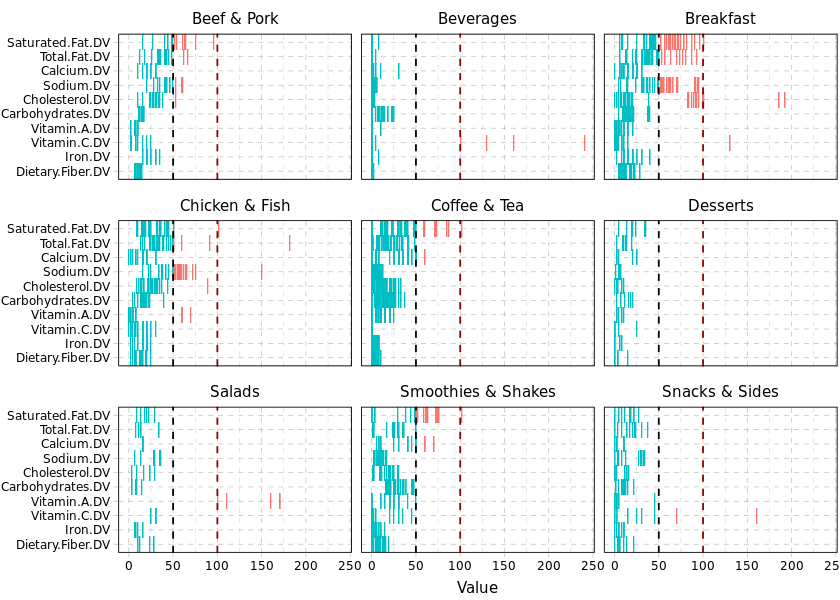

In [41]:
options(repr.plot.height=5, repr.plot.width=7)
hungry %>%
  gather(Nutrition, Value, Total.Fat:Iron.DV, factor_key=TRUE) %>%
  filter(grepl("DV", Nutrition)) %>%
  ggplot(aes(reorder(Nutrition, Value), Value)) +
  geom_point(aes(colour=Value<=50), shape = "|", size=3) +
  coord_flip() +
  geom_hline(yintercept = 50, linetype=2) + geom_hline(yintercept = 100, linetype = 2, col='darkred')+
  facet_wrap(~Category) +
  theme_pander(base_size=9) +
  theme(panel.border = element_rect(colour = "black", fill=NA), legend.position="none") +
  labs(x = NULL)

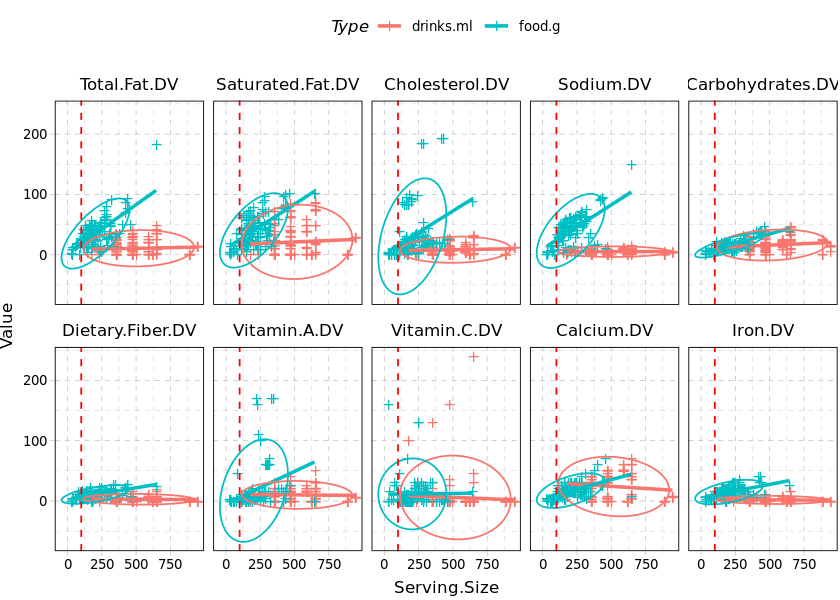

In [42]:
options(repr.plot.height=5, repr.plot.width=7)
hungry %>%
  gather(Nutrition, Value, Total.Fat:Iron.DV, factor_key=TRUE) %>%
  filter(grepl("DV", Nutrition)) %>%
  ggplot(aes(Serving.Size, Value, color=Type)) +
  geom_point(shape = "+", size=3) +
  geom_smooth(method = "lm", se=F) +
  stat_ellipse(type = "norm") +
  geom_vline(xintercept = 100, linetype=2, col='red') + 
  facet_wrap(~ Nutrition, nrow=2) +
  theme_pander(base_size=10) +
  theme(panel.border = element_rect(colour = "black", fill=NA), legend.position="top")

Calories present in each category of food and its box plot

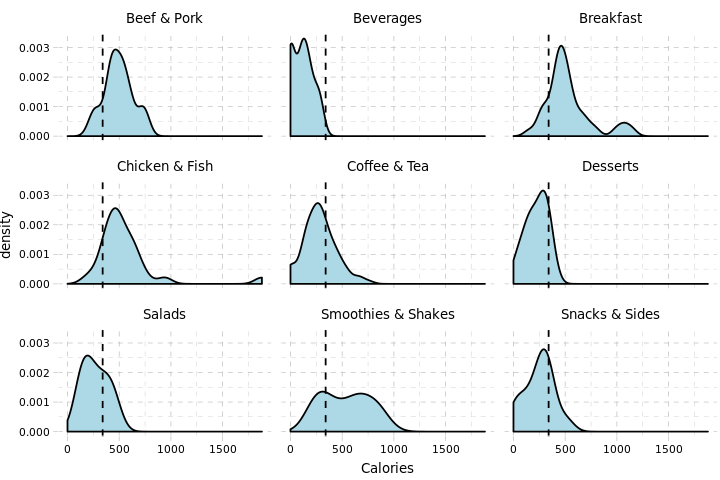

In [43]:
options(repr.plot.height=4, repr.plot.width=6)
ggplot(hungry, aes(x = Calories)) + 
  geom_density(fill="lightblue") +
  facet_wrap( ~ Category) +
  geom_vline(aes(xintercept = median(Calories)), linetype = 2) +
  theme_pander(base_size=8)


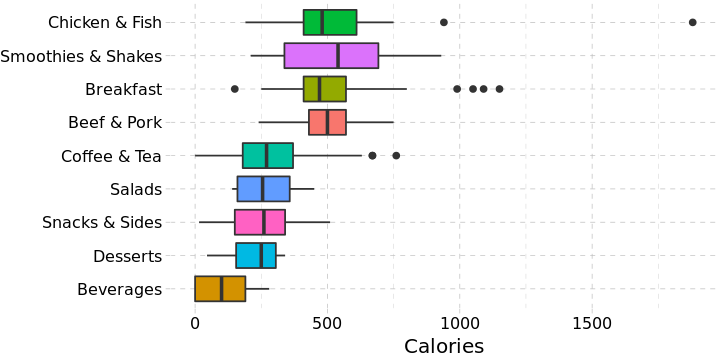

In [44]:
options(repr.plot.height=3, repr.plot.width=6)
ggplot(hungry, aes(x = reorder(Category, Calories), y = Calories,fill=Category)) +
  geom_boxplot() +
  coord_flip() +
  theme_pander() +
  labs(x = NULL)+theme(legend.position = "none")

Comparing each item and calories present in that we can see that chicken nuggets have the hightest and even the lowest calories so there is some relation between size and the calories present.

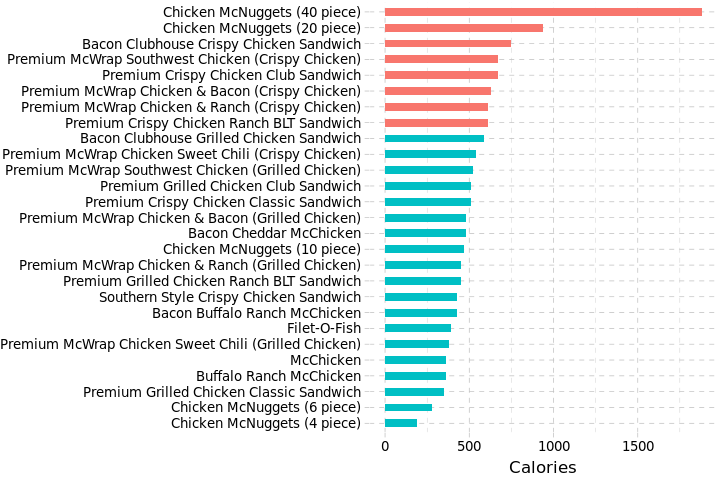

In [45]:
options(repr.plot.height=4, repr.plot.width=6)
hungry %>%
  filter(.,Category=="Chicken & Fish") %>%
  ggplot(aes(x = reorder(Item, Calories), y = Calories)) +
  geom_bar(aes(fill=Calories<600), width=0.5, stat = "identity") +
  coord_flip() +
  theme_pander(base_size = 10) +
  theme(legend.position="none") +
  labs(x = NULL)

Warning message:
“Removed 12 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 12 rows containing missing values (geom_point).”


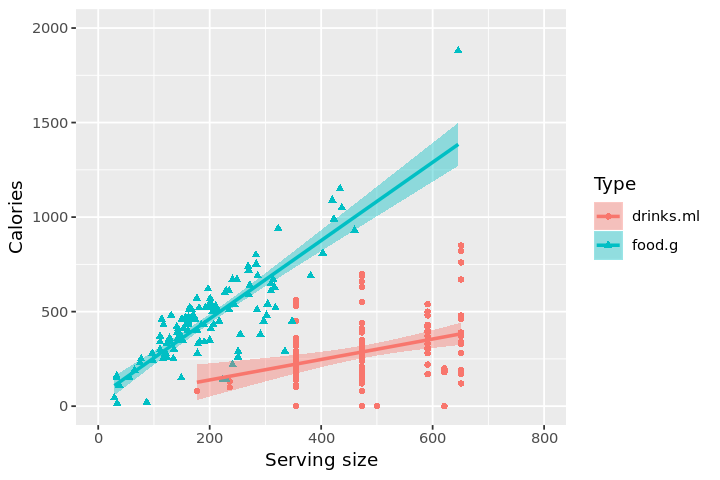

In [46]:
ggplot(hungry, aes(x=Serving.Size, y=Calories, color=Type, shape=Type)) +
  geom_point() + 
  geom_smooth(method=lm, aes(fill=Type))+xlab('Serving size')+ylim(0,2000)+xlim(0,800)

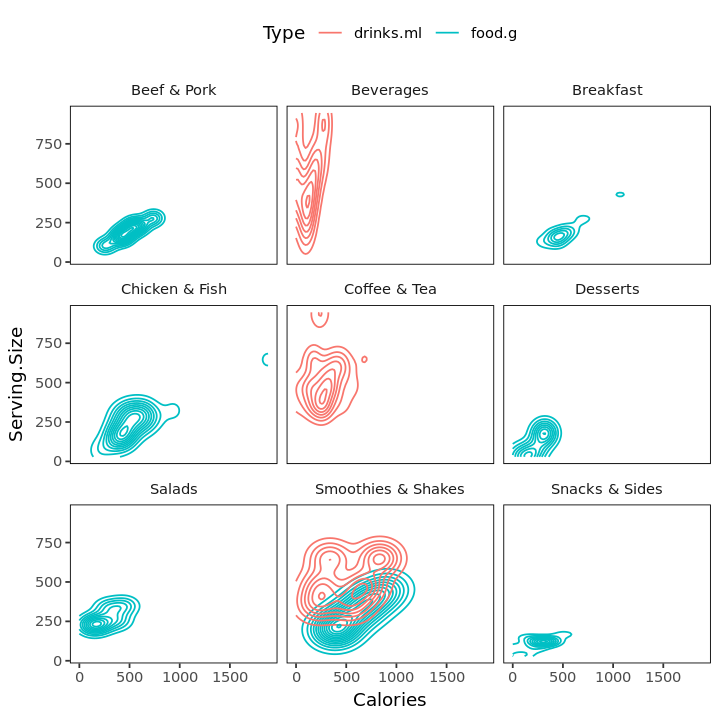

In [47]:
options(repr.plot.height=6, repr.plot.width=6)
ggplot(hungry, aes(x = Calories, y = Serving.Size, colour=Type)) +
  stat_density2d() +
  facet_wrap( ~ Category) +
  theme_tufte(base_family="Helvetica") +
  theme(panel.border = element_rect(colour = "black", fill=NA), legend.position="top")

After comparing the size and calories also we still get similar results

In [49]:
library(corrplot)

corrplot 0.84 loaded



correlation between the columns

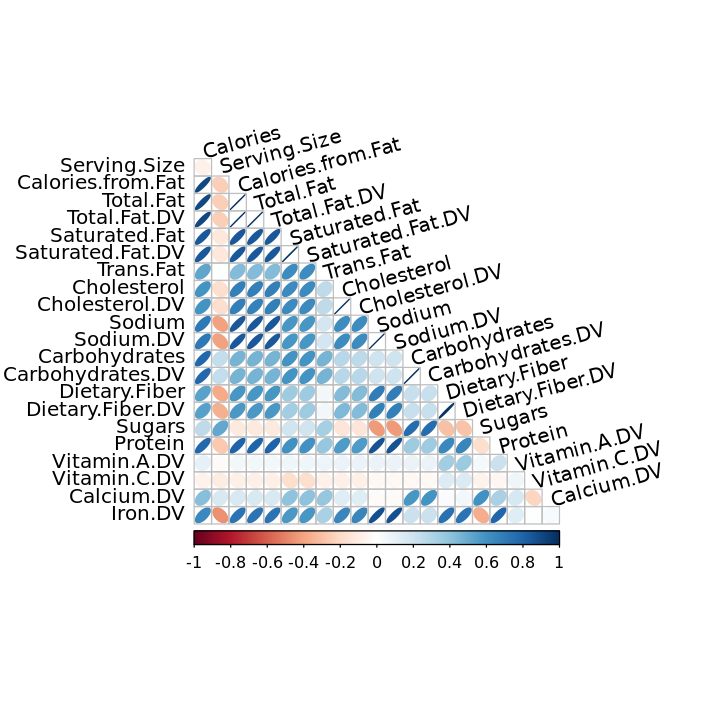

In [50]:
w.corr1<-cor(hungry[,c(4,3,5:24)],method="pearson")
corrplot(w.corr1, order="original",method="ellipse" ,type="lower", diag = F, tl.col="black", tl.srt=15)

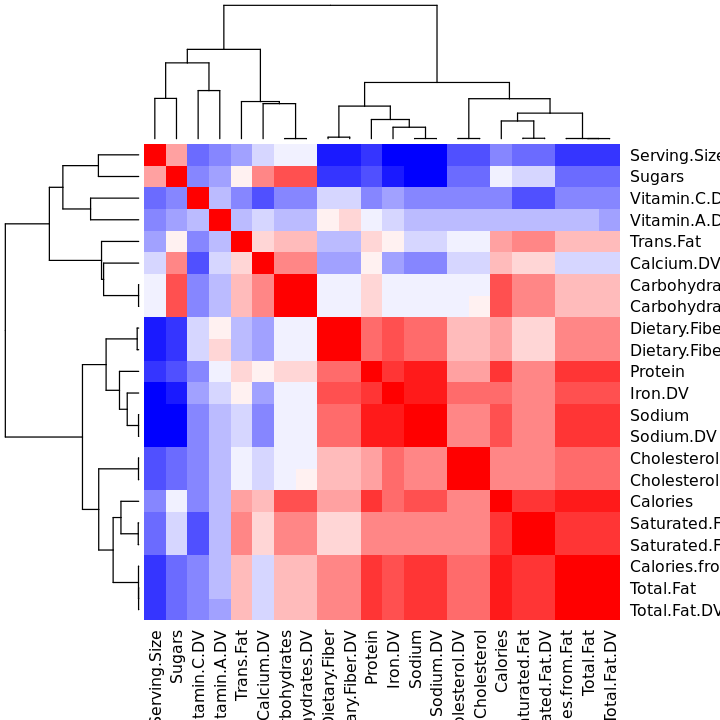

In [51]:
col<-colorRampPalette(c('blue','white','red'))(20)
heatmap(x=w.corr1, col=col,symm=T)

Taking 70% as training 

In [52]:
set.seed(123)
hungry$Type<-factor(hungry$Type)
smp_size <- floor(0.70 * nrow(hungry))
train_ind <- sample(seq_len(nrow(hungry)), size = smp_size)
train <- hungry[train_ind, ]
test <- hungry[-train_ind, ]

In [53]:
train<-train[,-c(1,2,5, 26)]
test<-test[,-c(1,2,5, 26)]

In [54]:
str(train)

'data.frame':	182 obs. of  22 variables:
 $ Serving.Size    : num  192 621 147 355 355 241 34 403 381 117 ...
 $ Calories        : int  520 0 380 530 270 220 15 810 690 430 ...
 $ Total.Fat       : num  24 0 17 23 9 8 0 32 23 27 ...
 $ Total.Fat.DV    : int  37 0 26 35 13 13 0 50 35 42 ...
 $ Saturated.Fat   : num  7 0 8 14 5 4 0 15 12 12 ...
 $ Saturated.Fat.DV: int  36 0 40 72 24 20 0 76 58 62 ...
 $ Trans.Fat       : num  0 0 1 1 0 0 0 1 1 0 ...
 $ Cholesterol     : int  50 0 75 65 25 85 0 60 55 30 ...
 $ Cholesterol.DV  : int  17 0 25 22 9 29 0 20 19 10 ...
 $ Sodium          : int  930 100 840 135 115 690 0 400 380 1080 ...
 $ Sodium.DV       : int  39 4 35 6 5 29 0 17 16 45 ...
 $ Carbohydrates   : int  61 0 34 76 40 8 4 114 106 34 ...
 $ Carbohydrates.DV: int  20 0 11 25 13 3 1 38 35 11 ...
 $ Dietary.Fiber   : int  3 0 2 1 1 2 0 2 1 2 ...
 $ Dietary.Fiber.DV: int  10 0 7 5 3 10 0 9 5 6 ...
 $ Sugars          : int  14 0 7 67 38 4 3 103 85 2 ...
 $ Protein         : int  15 3 22

In [56]:
library(caret)

Loading required package: lattice



Training the dataset

In [57]:
fitControl <- trainControl(
  # Repeated 5–fold CV 
  method = "repeatedcv",
 number = 5,
  ## repeated 10 times
  repeats = 10,
 verboseIter = TRUE,
  returnResamp = "all")

In [59]:
install.packages("GenABEL")

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

Warning message:
“package ‘GenABEL’ is not available (for R version 3.6.3)”


In [61]:
install.packages("ranger")

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

also installing the dependency ‘RcppEigen’




In [64]:
install.packages("e1071")

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)



Training using ranger method in caret

In [65]:
rrfFit <- train(Calories ~ ., 
                data = train,
               method = 'ranger',
                tuneLength = 10, 
               trControl = fitControl,
               num.trees = 700,
               importance = "permutation")

+ Fold1.Rep01: mtry= 2, min.node.size=5, splitrule=variance 
- Fold1.Rep01: mtry= 2, min.node.size=5, splitrule=variance 
+ Fold1.Rep01: mtry= 4, min.node.size=5, splitrule=variance 
- Fold1.Rep01: mtry= 4, min.node.size=5, splitrule=variance 
+ Fold1.Rep01: mtry= 6, min.node.size=5, splitrule=variance 
- Fold1.Rep01: mtry= 6, min.node.size=5, splitrule=variance 
+ Fold1.Rep01: mtry= 8, min.node.size=5, splitrule=variance 
- Fold1.Rep01: mtry= 8, min.node.size=5, splitrule=variance 
+ Fold1.Rep01: mtry=10, min.node.size=5, splitrule=variance 
- Fold1.Rep01: mtry=10, min.node.size=5, splitrule=variance 
+ Fold1.Rep01: mtry=12, min.node.size=5, splitrule=variance 
- Fold1.Rep01: mtry=12, min.node.size=5, splitrule=variance 
+ Fold1.Rep01: mtry=14, min.node.size=5, splitrule=variance 
- Fold1.Rep01: mtry=14, min.node.size=5, splitrule=variance 
+ Fold1.Rep01: mtry=16, min.node.size=5, splitrule=variance 
- Fold1.Rep01: mtry=16, min.node.size=5, splitrule=variance 
+ Fold1.Rep01: mtry=18, 

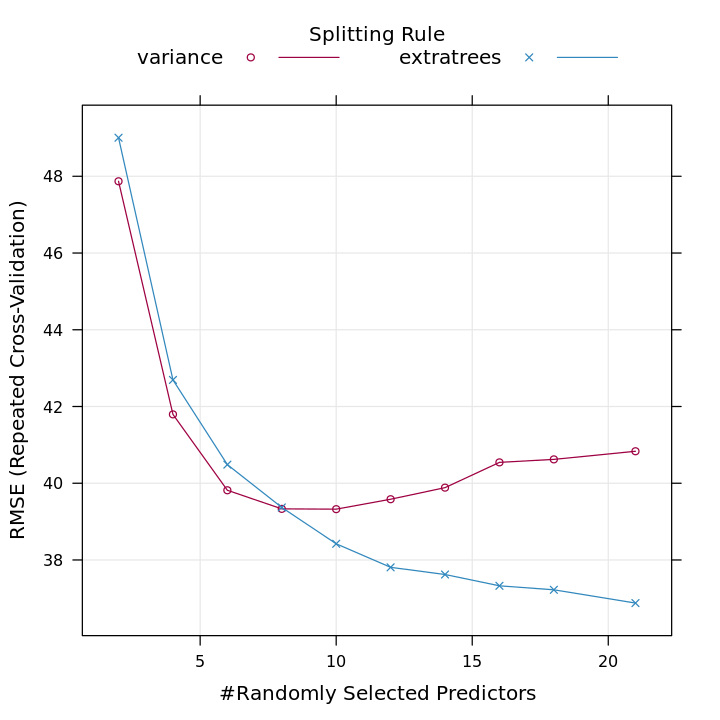

In [66]:
trellis.par.set(caretTheme())
plot(rrfFit)

finding the accuracy

[1] 118.0089

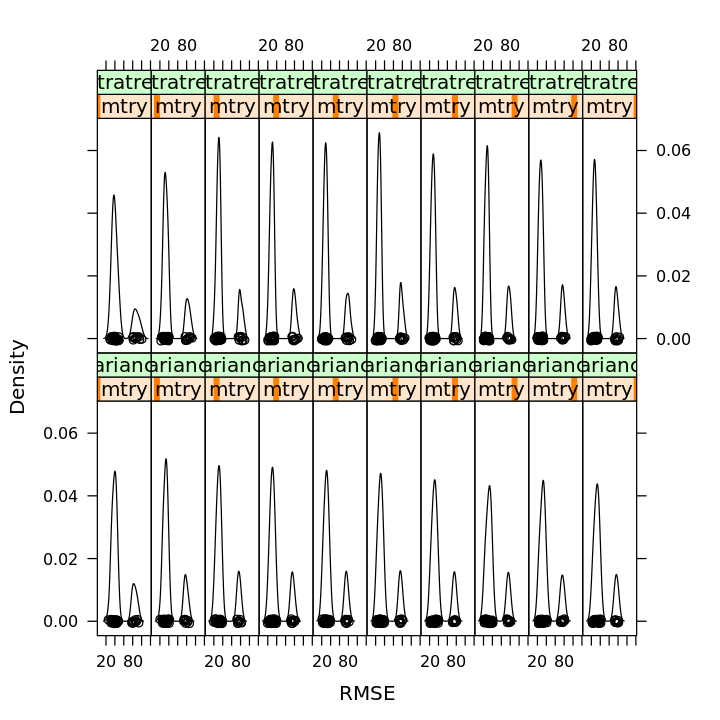

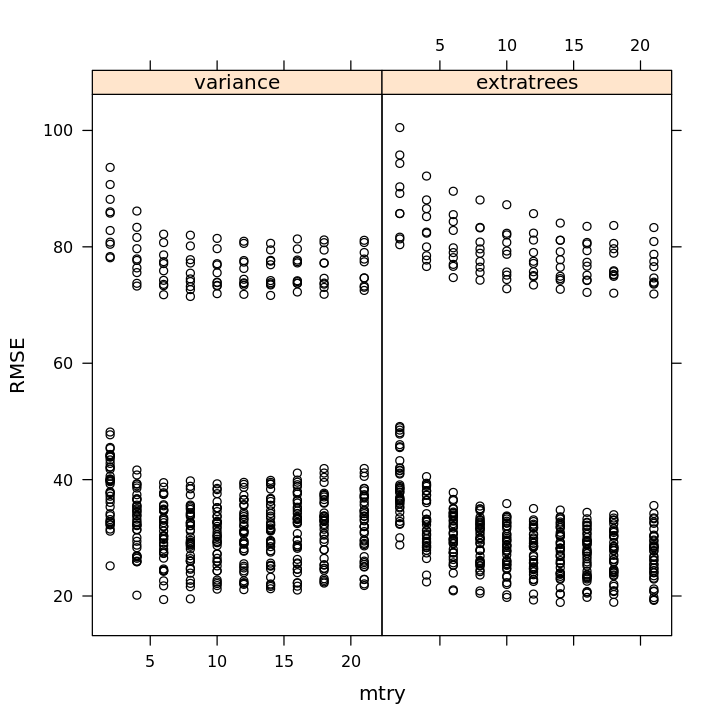

In [67]:
testPred <- predict(rrfFit , test)
RMSE(testPred,test$Calories)


densityplot(rrfFit,
           adjust = 1.25)

xyplot(rrfFit)

Find the most important variables that play a role in calorie consumption

ranger variable importance

  only 20 most important variables shown (out of 21)

                 Overall
Total.Fat        100.000
Total.Fat.DV      99.680
Saturated.Fat.DV  62.076
Carbohydrates     61.453
Carbohydrates.DV  61.283
Saturated.Fat     59.847
Protein           18.140
Sodium            15.906
Sugars            15.270
Sodium.DV         13.186
Cholesterol       10.380
Cholesterol.DV     9.552
Trans.Fat          7.307
Serving.Size       7.013
Calcium.DV         6.865
Dietary.Fiber      3.440
Iron.DV            3.333
Dietary.Fiber.DV   2.487
Vitamin.A.DV       2.240
Vitamin.C.DV       0.323

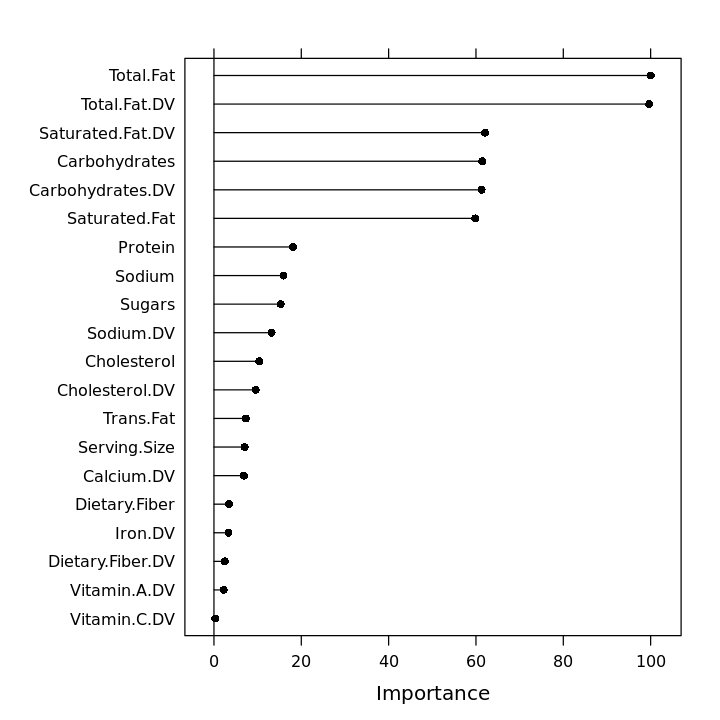

In [68]:
rfImp <- varImp(rrfFit)
rfImp
plot(rfImp,top = 20)

From this we see that Total fat , Saturated Fat , carbohydrates play an imporant role in calorie consumption per day so it is better to avoid these in our diet.